## Argo Test

In this notebook I'm attempting to replicate some of the glider results with Argo data in the region of 30E-40E and 50S-55S.

In [79]:
import scipy
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

In [47]:
ds = argo_loader.region([30,40,-55,-50, 200,1500]).to_xarray()

In [48]:
ds

<xarray.Dataset>
Dimensions:                (N_POINTS: 301223)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 301220 301221 301222
    LATITUDE               (N_POINTS) float64 -50.15 -50.15 ... -54.98 -54.98
    LONGITUDE              (N_POINTS) float64 33.29 33.29 33.29 ... 30.34 30.34
    TIME                   (N_POINTS) datetime64[ns] 2002-02-27T04:02:50 ... ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 3 3 3 3 3 3 3 3
    CYCLE_NUMBER           (N_POINTS) int32 12 12 12 12 12 12 ... 51 51 51 51 51
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int32 1900101 1900101 ... 6904069 6904069
    POSITION_QC            (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL                   (N_POINTS) float32 34.04 34.06 34.09 ... 34.71 34.71
    PSAL_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                   (N_POINTS) float32 2.152 2.212 2.225 ... 1.142 1.137
    TEMP_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           amf2288
    Fetched_date:         2022/07/13
    Fetched_constraints:  [x=30.00/40.00; y=-55.00/-50.00; z=200.0/1500.0]
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...
    history:              Variables filtered according to DATA_MODE; Variable...

In [49]:
#how did it come up with 651 N_LEVELS?
ds_prof=ds.argo.point2profile()
ds_prof

<xarray.Dataset>
Dimensions:                (N_PROF: 2081, N_LEVELS: 651)
Coordinates:
  * N_PROF                 (N_PROF) int64 0 20 1 21 2 ... 1537 2080 746 711 1837
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 5 ... 646 647 648 649 650
    LATITUDE               (N_PROF) float64 -50.15 -51.69 ... -51.03 -54.98
    LONGITUDE              (N_PROF) float64 33.29 30.61 35.15 ... 39.67 30.34
    TIME                   (N_PROF) datetime64[ns] 2002-02-27T04:02:50 ... 20...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 3 9 2 3 22 4 4 3
    CYCLE_NUMBER           (N_PROF) int32 12 12 13 13 14 14 ... 50 289 60 60 51
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'R' 'R' 'A'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 1900101 1900103 ... 1902296 6904069
    POSITION_QC            (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL                   (N_PROF, N_LEVELS) float32 34.04 34.06 ... nan nan
    PSAL_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                   (N_PROF, N_LEVELS) float32 2.152 2.212 ... nan nan
    TEMP_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           amf2288
    Fetched_date:         2022/07/13
    Fetched_constraints:  [x=30.00/40.00; y=-55.00/-50.00; z=200.0/1500.0]
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...
    history:              Variables filtered according to DATA_MODE; Variable...

In [63]:
#stick with argopy, look through every profile to determine rough sampling rate, then discard all data that doesn't have the rate we'd like (2m)
##function should be able to change the sampling rate we feed in
##
prof_1=ds_prof.PRES.isel(N_PROF=-10)
prof_1

<xarray.DataArray 'PRES' (N_LEVELS: 651)>
array([ 201.96,  204.  ,  206.  ,  208.  ,  210.  ,  212.  ,  214.  ,
        215.96,  218.  ,  220.  ,  221.92,  223.96,  225.96,  228.  ,
        230.04,  232.04,  234.  ,  236.  ,  238.  ,  240.  ,  242.04,
        244.04,  246.  ,  247.96,  249.96,  252.  ,  254.  ,  256.08,
        258.04,  260.  ,  261.96,  263.96,  266.  ,  267.96,  270.  ,
        271.96,  274.  ,  276.  ,  278.04,  280.04,  282.  ,  284.  ,
        286.  ,  288.04,  290.  ,  292.  ,  294.  ,  296.  ,  298.04,
        300.  ,  301.96,  303.96,  305.96,  308.  ,  309.96,  311.96,
        313.96,  316.  ,  318.  ,  320.  ,  322.04,  324.04,  326.  ,
        327.96,  329.96,  332.  ,  333.96,  335.96,  337.96,  339.92,
        341.96,  343.96,  345.96,  348.  ,  350.  ,  351.96,  353.96,
        355.96,  357.96,  360.  ,  362.  ,  363.96,  366.  ,  368.  ,
        370.04,  372.08,  374.04,  376.  ,  378.  ,  380.  ,  382.  ,
        383.96,  385.96,  388.  ,  389.96,  391.92,  393.96,  395.96,
        398.  ,  400.04,  402.  ,  404.  ,  406.  ,  408.04,  410.04,
        412.  ,  413.96,  415.96,  417.96,  420.  ,  421.96,  423.96,
        425.96,  428.  ,  430.  ,  432.04,  434.04,  436.  ,  438.  ,
        439.96,  442.  ,  444.  ,  446.  ,  447.96,  450.  ,  452.  ,
        454.  ,  456.  ,  458.  ,  460.04,  462.04,  464.04,  466.  ,
        467.96,  470.  ,  472.  ,  474.04,  476.04,  478.  ,  480.  ,
...
       1238.04, 1240.  , 1241.96, 1244.  , 1246.  , 1247.96, 1250.  ,
       1252.04, 1254.  , 1256.  , 1258.04, 1260.04, 1262.04, 1264.  ,
       1265.96, 1268.  , 1270.  , 1272.  , 1274.04, 1276.  , 1277.96,
       1280.  , 1282.  , 1284.04, 1286.  , 1287.96, 1290.  , 1292.  ,
       1293.96, 1296.  , 1298.  , 1300.  , 1302.  , 1304.  , 1306.  ,
       1308.  , 1310.  , 1312.  , 1314.  , 1316.  , 1317.96, 1319.96,
       1321.96, 1324.  , 1325.96, 1327.96, 1329.96, 1331.92, 1333.96,
       1336.  , 1338.04, 1340.  , 1342.04, 1344.  , 1345.96, 1347.96,
       1350.  , 1352.  , 1353.96, 1356.  , 1358.  , 1359.96, 1361.92,
       1363.96, 1366.  , 1368.  , 1369.96, 1372.  , 1374.  , 1376.04,
       1378.  , 1379.92, 1381.92, 1384.  , 1386.  , 1388.04, 1390.04,
       1392.  , 1394.04, 1396.08, 1398.  , 1399.96, 1402.  , 1404.  ,
       1406.04, 1408.  , 1409.96, 1412.  , 1414.04, 1416.  , 1418.  ,
       1419.96, 1421.96, 1424.04, 1426.04, 1427.96, 1430.  , 1432.04,
       1434.  , 1436.  , 1437.96, 1440.  , 1442.08, 1444.04, 1446.  ,
       1448.  , 1449.96, 1452.  , 1454.04, 1456.04, 1458.  , 1459.96,
       1462.04, 1464.08, 1466.  , 1468.  , 1470.04, 1472.  , 1474.  ,
       1476.  , 1478.  , 1480.  , 1481.96, 1484.04, 1486.  , 1488.04,
       1490.04, 1492.04, 1494.04, 1496.  , 1498.04,     nan,     nan],
      dtype=float32)
Coordinates:
    N_PROF     int64 710
  * N_LEVELS   (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 644 645 646 647 648 649 650
    LATITUDE   float64 -52.12
    LONGITUDE  float64 39.32
    TIME       datetime64[ns] 2022-07-01T17:25:57
Attributes:
    long_name:      Sea Pressure
    standard_name:  sea_water_pressure
    units:          decibar
    valid_min:      0.0
    valid_max:      12000.0
    resolution:     0.1
    axis:           Z
    casted:         1

(array([ 14.,   0., 177.,   0.,   0., 271.,   0., 165.,   0.,  21.]),
 array([1.9199219, 1.9359375, 1.9519532, 1.9679687, 1.9839844, 2.       ,
        2.0160155, 2.0320313, 2.0480468, 2.0640626, 2.0800781],
       dtype=float32),
 <BarContainer object of 10 artists>)

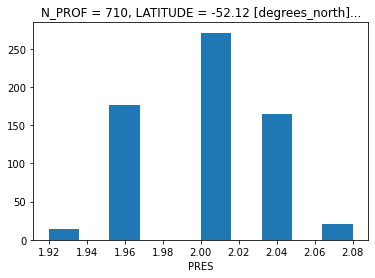

In [64]:
prof_1.diff('N_LEVELS').plot.hist()

(array([15.,  7.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  8.]),
 array([  9.5     ,  18.609997,  27.719995,  36.829994,  45.93999 ,
         55.049988,  64.15999 ,  73.26998 ,  82.37998 ,  91.489975,
        100.599976], dtype=float32),
 <BarContainer object of 10 artists>)

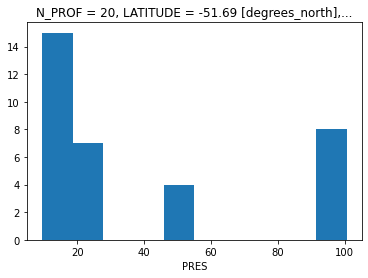

In [65]:
#function should take all floats with mean less than 4m
#look through docs to see if there are floats that have good sampling above 1000m but poor below, could keep top but discard bottom
prof_2=ds_prof.PRES.isel(N_PROF=1)
prof_2.diff('N_LEVELS').plot.hist()

In [66]:
prof_1.diff('N_LEVELS').median()

<xarray.DataArray 'PRES' ()>
array(2., dtype=float32)
Coordinates:
    N_PROF     int64 710
    LATITUDE   float64 -52.12
    LONGITUDE  float64 39.32
    TIME       datetime64[ns] 2022-07-01T17:25:57

In [68]:
ds_prof

<xarray.Dataset>
Dimensions:                (N_PROF: 2081, N_LEVELS: 651)
Coordinates:
  * N_PROF                 (N_PROF) int64 0 20 1 21 2 ... 1537 2080 746 711 1837
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 5 ... 646 647 648 649 650
    LATITUDE               (N_PROF) float64 -50.15 -51.69 ... -51.03 -54.98
    LONGITUDE              (N_PROF) float64 33.29 30.61 35.15 ... 39.67 30.34
    TIME                   (N_PROF) datetime64[ns] 2002-02-27T04:02:50 ... 20...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 3 9 2 3 22 4 4 3
    CYCLE_NUMBER           (N_PROF) int32 12 12 13 13 14 14 ... 50 289 60 60 51
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'R' 'R' 'A'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 1900101 1900103 ... 1902296 6904069
    POSITION_QC            (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL                   (N_PROF, N_LEVELS) float32 34.04 34.06 ... nan nan
    PSAL_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                   (N_PROF, N_LEVELS) float32 2.152 2.212 ... nan nan
    TEMP_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           amf2288
    Fetched_date:         2022/07/13
    Fetched_constraints:  [x=30.00/40.00; y=-55.00/-50.00; z=200.0/1500.0]
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...
    history:              Variables filtered according to DATA_MODE; Variable...

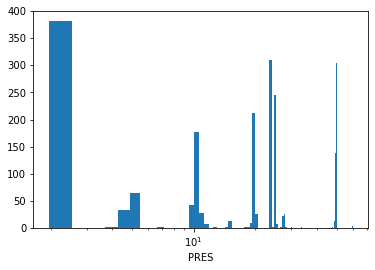

In [74]:
ds_prof.PRES.diff('N_LEVELS').median('N_LEVELS').plot.hist(bins=100)
plt.xscale('log')

In [81]:
median_dp=ds_prof.PRES.where(ds_prof.PRES<990).diff('N_LEVELS').median('N_LEVELS')
median_dp.where(np.isnan(median_dp),drop=True)

<xarray.DataArray 'PRES' (N_PROF: 1)>
array([nan], dtype=float32)
Coordinates:
  * N_PROF     (N_PROF) int64 892
    LATITUDE   (N_PROF) float64 -54.86
    LONGITUDE  (N_PROF) float64 31.71
    TIME       (N_PROF) datetime64[ns] 2021-02-07T19:21:00

In [83]:
ds_prof.sel(N_PROF=892)

<xarray.Dataset>
Dimensions:                (N_LEVELS: 651)
Coordinates:
    N_PROF                 int64 892
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 5 ... 646 647 648 649 650
    LATITUDE               float64 -54.86
    LONGITUDE              float64 31.71
    TIME                   datetime64[ns] 2021-02-07T19:21:00
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  int32 2
    CYCLE_NUMBER           int32 148
    DATA_MODE              <U1 'D'
    DIRECTION              <U1 'A'
    PLATFORM_NUMBER        int32 3901612
    POSITION_QC            int32 1
    ...                     ...
    PRES_QC                int32 1
    PSAL                   (N_LEVELS) float32 34.74 34.74 34.74 ... nan nan nan
    PSAL_QC                int32 1
    TEMP                   (N_LEVELS) float32 1.661 1.655 1.653 ... nan nan nan
    TEMP_QC                int32 1
    TIME_QC                int32 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           amf2288
    Fetched_date:         2022/07/13
    Fetched_constraints:  [x=30.00/40.00; y=-55.00/-50.00; z=200.0/1500.0]
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...
    history:              Variables filtered according to DATA_MODE; Variable...

(array([  0., 382.,   1.,  99.,   1.,   0., 225.,  30.,   1.,  13.,   0.,
          1., 240.]),
 array([ 0.        ,  1.53846154,  3.07692308,  4.61538462,  6.15384615,
         7.69230769,  9.23076923, 10.76923077, 12.30769231, 13.84615385,
        15.38461538, 16.92307692, 18.46153846, 20.        ]),
 <BarContainer object of 13 artists>)

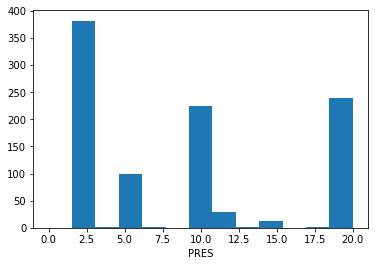

In [99]:
ds_prof.PRES.where(ds_prof.PRES<1500).diff('N_LEVELS').median('N_LEVELS').plot.hist(bins=np.linspace(0,20,14))

In [100]:
median_dp

<xarray.DataArray 'PRES' (N_PROF: 2081)>
array([10.550003, 10.300011, 10.200005, ...,  2.      ,  2.      ,
        5.      ], dtype=float32)
Coordinates:
  * N_PROF     (N_PROF) int64 0 20 1 21 2 22 3 ... 1823 1537 2080 746 711 1837
    LATITUDE   (N_PROF) float64 -50.15 -51.69 -50.79 ... -54.56 -51.03 -54.98
    LONGITUDE  (N_PROF) float64 33.29 30.61 35.15 32.6 ... 34.35 39.67 30.34
    TIME       (N_PROF) datetime64[ns] 2002-02-27T04:02:50 ... 2022-07-13T05:...

In [101]:
np.max(np.unique(median_dp.N_PROF))

2080

In [102]:
ind_2m=median_dp.where(median_dp<3.,drop=True).N_PROF
ind_2m

<xarray.DataArray 'N_PROF' (N_PROF: 416)>
array([1063, 1064, 1065, ..., 2080,  746,  711])
Coordinates:
  * N_PROF     (N_PROF) int64 1063 1064 1065 1066 1067 ... 710 1537 2080 746 711
    LATITUDE   (N_PROF) float64 -50.2 -50.24 -50.29 ... -51.23 -54.56 -51.03
    LONGITUDE  (N_PROF) float64 30.07 30.13 30.2 30.28 ... 37.6 34.35 39.67
    TIME       (N_PROF) datetime64[ns] 2008-02-20T09:07:35 ... 2022-07-11T14:...
Attributes:
    casted:   1

In [104]:
ds_sel=ds_prof.sel(N_PROF=ind_2m)

In [116]:
ds_interp

<xarray.Dataset>
Dimensions:                (N_PROF: 416, PRES_INTERPOLATED: 350)
Coordinates:
  * N_PROF                 (N_PROF) int64 1063 1064 1065 1066 ... 2080 746 711
    LATITUDE               (N_PROF) float64 -50.2 -50.24 ... -54.56 -51.03
    LONGITUDE              (N_PROF) float64 30.07 30.13 30.2 ... 34.35 39.67
    TIME                   (N_PROF) datetime64[ns] 2008-02-20T09:07:35 ... 20...
  * PRES_INTERPOLATED      (PRES_INTERPOLATED) int64 200 202 204 ... 894 896 898
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int32 1 1 1 1 1 1 1 1 ... 22 4 4 4 3 22 4 4
    CYCLE_NUMBER           (N_PROF) int32 1 2 3 4 5 6 7 ... 59 59 50 289 60 60
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'R' 'A' 'R' 'R'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 5901492 5901492 ... 1902298 1902296
    PRES                   (N_PROF, PRES_INTERPOLATED) float32 200.0 ... 898.0
    PSAL                   (N_PROF, PRES_INTERPOLATED) float32 34.1 ... 34.68
    TEMP                   (N_PROF, PRES_INTERPOLATED) float32 2.883 ... 2.533
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           amf2288
    Fetched_date:         2022/07/13
    Fetched_constraints:  [x=30.00/40.00; y=-55.00/-50.00; z=200.0/1500.0]
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...
    history:              Variables filtered according to DATA_MODE; Variable...

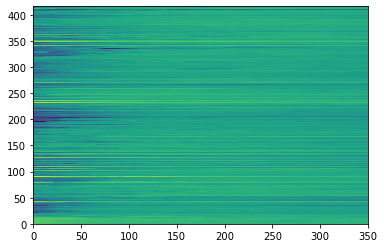

In [115]:
ds_interp=ds_sel.argo.interp_std_levels(np.arange(200,900,2))
#ds_interp.isel(N_PROF=21).TEMP.plot()
plt.pcolormesh(ds_interp.TEMP)
